# Exercise: NEISS, Question Set C

#### Summary

The [National Electronic Injury Surveillance System](https://www.cpsc.gov/Safety-Education/Safety-Guides/General-Information/National-Electronic-Injury-Surveillance-System-NEISS) is a data product produced by the US Consumer Product Safety Commission. It tracks emergency room injuries related to consumer products (e.g., "a door fell on me!").

#### Files

- **nss15.tsv**: injury data (one injury per row)
- **2017NEISSCodingManualCPSConlyNontrauma.pdf**: column definitions and explanations
- **2015 Neiss data highlights.pdf**: a partial summary of the data
- **2017ComparabilityTable.pdf**: product code definitions
- **categories-cleaned.txt**: product code definitions in CSV format (great for joining!)

#### Source

https://www.cpsc.gov/Safety-Education/Safety-Guides/General-Information/National-Electronic-Injury-Surveillance-System-NEISS

#### Skills

- Reading tab-separated files
- Ignoring bad lines
- Replacing values
- Using numpy/`np.nan`
- String search using regular expressions
- Averages practice
- Converting `.value_counts()` and similar results into DataFrames

# Read in `nss15.tsv`

Some of the lines just **aren't formatted correctly**. Maybe we can avoid those?

In [2]:
#tsv has tabs instead of commas. So change the separator (sep) to read it as tags 
import pandas as pd
%matplotlib inline
df = pd.read_csv('nss15.tsv', sep = "\t", error_bad_lines = False, dtype= {'prod1': str, 'prod2': str})
df.head()

b'Skipping line 10822: expected 19 fields, saw 20\n'
b'Skipping line 48623: expected 19 fields, saw 20\nSkipping line 62534: expected 19 fields, saw 20\n'
b'Skipping line 103739: expected 19 fields, saw 20\n'
b'Skipping line 135495: expected 19 fields, saw 20\nSkipping line 151678: expected 19 fields, saw 20\n'
b'Skipping line 237135: expected 19 fields, saw 20\nSkipping line 240597: expected 19 fields, saw 20\n'
b'Skipping line 274270: expected 19 fields, saw 20\nSkipping line 277461: expected 19 fields, saw 20\n'


,CPSC Case #,trmt_date,psu,weight,stratum,age,sex,race,race_other,diag,diag_other,body_part,disposition,location,fmv,prod1,prod2,narr1,narr2
0,150733174,07/11/2015,38,15.7762,V,5,1,0,NaN,57,NaN,33,1,9,0,1267,NaN,5 YR OLD MALE PLAYING SOCCER BLOCKING BALL AND...,X IT
1,150734723,07/06/2015,43,83.2157,S,36,1,1,NaN,57,NaN,34,1,1,0,1439,4057,"L WRIST FX(?)/36YOWM 2 WKS AGO@G-FRIENDS HM,MO...",AN OBJECT&TWISTED WRIST TRYING TO CONTOL MOWER...
2,150817487,08/02/2015,51,74.8813,L,20,2,0,NaN,71,OTITIS EXTERNA,94,1,0,0,3274,NaN,20 YO F C/O EAR PAIN 1 DAY SAS WAS SWIMMING YE...,T TRIED TO USE ***S TO REMOVE WAX MADE IT WORS...
3,150717776,06/26/2015,41,15.7762,V,61,1,0,NaN,71,PAIN,35,1,0,0,611,NaN,61YOM W/KNEE PAIN S/P FALLING IN SHOWER 2 DAYS...,NaN
4,150721694,07/04/2015,42,74.8813,L,88,2,3,HISPANIC,62,NaN,75,1,0,0,1893,1807,88YOF PAIN TO HEAD WHEN FALL TO FLOOR WHEN WAL...,DOOR AND FELL.DENIES LOC. DX HEAD INJURY


In [3]:
#series , sort_values() or sort_index()... index is the far-left line when you do value counts and
#whatever comes after that is values.
#to make a new df you always need to filter.. df_wall - df[df.....]

### Check that your dataframe has 357727 rows and 19 columns.

In [4]:
df.shape

(357727, 19)

### List the columns and their data types

In [5]:
df.columns

Index(['CPSC Case #', 'trmt_date', 'psu', 'weight', 'stratum', 'age', 'sex',
       'race', 'race_other', 'diag', 'diag_other', 'body_part', 'disposition',
       'location', 'fmv', 'prod1', 'prod2', 'narr1', 'narr2'],
      dtype='object')

In [6]:
df.dtypes

CPSC Case #      int64
trmt_date       object
psu              int64
weight         float64
stratum         object
age              int64
sex              int64
race             int64
race_other      object
diag             int64
diag_other      object
body_part        int64
disposition      int64
location         int64
fmv              int64
prod1           object
prod2           object
narr1           object
narr2           object
dtype: object

### What does each column mean?

In [7]:
#treatment date, prod = product used, narr2 = narrative given about accident, narr1 = patient description 

# Cleaning up a column

Take a look at the **sex** column. How many rows of each sex are there?

In [8]:
#male is 1, female is 2, 0 is not recorded 
df['sex'].value_counts()

1    195071
2    162654
0         2
Name: sex, dtype: int64

## Replace the numbers with the appropriate words they stand for.

Those numbers are terrible - codes are fine for storage but not really for reading. **Replace the numbers with the  words they stand for.**

Refer to page 7 of the column definitions file.

In [9]:
#save into column and then the dataframe 
df.sex = df['sex'].replace(1,'Male')
df.sex = df['sex'].replace(2, 'Female')
df.sex = df['sex'].replace(0, 'Not Recorded')
df.head()

,CPSC Case #,trmt_date,psu,weight,stratum,age,sex,race,race_other,diag,diag_other,body_part,disposition,location,fmv,prod1,prod2,narr1,narr2
0,150733174,07/11/2015,38,15.7762,V,5,Male,0,NaN,57,NaN,33,1,9,0,1267,NaN,5 YR OLD MALE PLAYING SOCCER BLOCKING BALL AND...,X IT
1,150734723,07/06/2015,43,83.2157,S,36,Male,1,NaN,57,NaN,34,1,1,0,1439,4057,"L WRIST FX(?)/36YOWM 2 WKS AGO@G-FRIENDS HM,MO...",AN OBJECT&TWISTED WRIST TRYING TO CONTOL MOWER...
2,150817487,08/02/2015,51,74.8813,L,20,Female,0,NaN,71,OTITIS EXTERNA,94,1,0,0,3274,NaN,20 YO F C/O EAR PAIN 1 DAY SAS WAS SWIMMING YE...,T TRIED TO USE ***S TO REMOVE WAX MADE IT WORS...
3,150717776,06/26/2015,41,15.7762,V,61,Male,0,NaN,71,PAIN,35,1,0,0,611,NaN,61YOM W/KNEE PAIN S/P FALLING IN SHOWER 2 DAYS...,NaN
4,150721694,07/04/2015,42,74.8813,L,88,Female,3,HISPANIC,62,NaN,75,1,0,0,1893,1807,88YOF PAIN TO HEAD WHEN FALL TO FLOOR WHEN WAL...,DOOR AND FELL.DENIES LOC. DX HEAD INJURY


## Confirm you have 195071 male, 162654 female, and 2 "Not Recorded."

In [10]:
df['sex'].value_counts()

Male            195071
Female          162654
Not Recorded         2
Name: sex, dtype: int64

## Graph the number of men and women, but don’t included the “Not Recorded” records

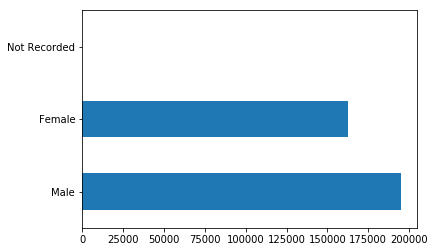

In [11]:
#you can plot() dataframe with value counts! 
df['sex'].value_counts().plot(kind = 'barh')

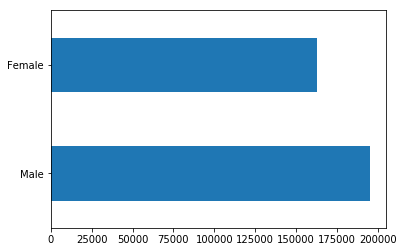

In [12]:
recorded = df[df.sex != 'Not Recorded'].sex.value_counts()
recorded.plot(kind = 'barh')


## "Not recorded" seems silly - change it to be `NaN` instead

Don't use `na_values` for this.

In [13]:
#want to talk about NaN? We need numpy. Numpy is the number stuff underneath pandas 
import numpy as np
np.nan

nan

In [14]:
df['sex'].replace('Not Recorded', np.nan, inplace=True)
df['sex'].value_counts(dropna=False)
#want to still see the NaN values? value_counts(dropna=False)

Male      195071
Female    162654
NaN            2
Name: sex, dtype: int64

## Graph the count of men and women, but don’t included the “Not Recorded” records

Yes, again! The code you use should be different this time.

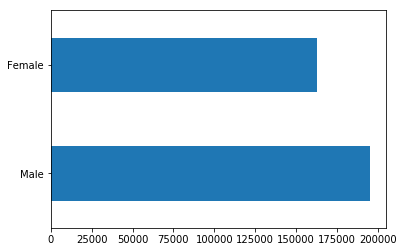

In [15]:
df['sex'].value_counts().plot(kind = 'barh')


# Wall punching

## Find every instance where the narrative includes punching a wall

Include phrases like "punched a wall" or "punch wall" or "punched ten thousand walls." Do not type them each individually. How do you do that?????

In [16]:
df['narr1'].value_counts().head()

17 YO MALE PLAYING BASKETBALL.  DX ANKLE SPRAIN      12
14 YO MALE PLAYING BASKETBALL.  DX ANKLE SPRAIN      12
16 YO MALE PLAYING BASKETBALL.  DX ANKLE SPRAIN      11
15 YO MALE PLAYING BASKETBALL.  DX ANKLE SPRAIN      11
9YOF GOT EAR INFECTION AFTER SWIMMING;  DX OTITIS     8
Name: narr1, dtype: int64

In [17]:
#find fell off bike in regex 
#df[df.narr1.str.contains('F[AE]LL.*BI[CK]")]

In [18]:
df.narr1.str.contains("PUNCH.*WALL").value_counts()

False    355955
True       1772
Name: narr1, dtype: int64

In [19]:
df_wall_punch = df[df['narr1'].str.contains("PUNCH.*WALL")]
df_wall_punch['sex'].value_counts()


Male      1348
Female     424
Name: sex, dtype: int64

## Graph the gender distribution of wall-punching.

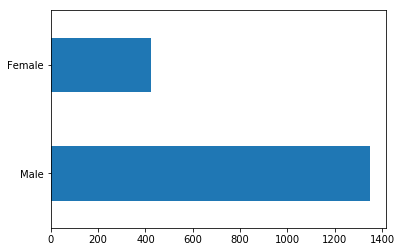

In [20]:
df_wall_punch = df[df['narr1'].str.contains("PUNCH.*WALL")]
df_wall_punch['sex'].value_counts().plot(kind = 'barh')


## Find the average age of a wall-puncher.

Graph the distribution of the ages, too.

In [21]:
df.columns


Index(['CPSC Case #', 'trmt_date', 'psu', 'weight', 'stratum', 'age', 'sex',
       'race', 'race_other', 'diag', 'diag_other', 'body_part', 'disposition',
       'location', 'fmv', 'prod1', 'prod2', 'narr1', 'narr2'],
      dtype='object')

In [22]:
import statistics
df_wall_punch['age'].mean()

24.303611738148984

# Which months are the most popular for wall punching?

The month is hidden inside of the `trmt_date` column - you'll need to extract it. To check, January should have 27109 cases.

In [23]:
df_wall_punch['trmt_date'].str.extract('(\d\d)').value_counts().sort_values(ascending = False).head(3)
#September

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  """Entry point for launching an IPython kernel.


09    175
06    170
10    162
Name: trmt_date, dtype: int64

## Graph the amount of wall punching in each month

Having numbers on the x axis (1-12) is fine.

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  """Entry point for launching an IPython kernel.


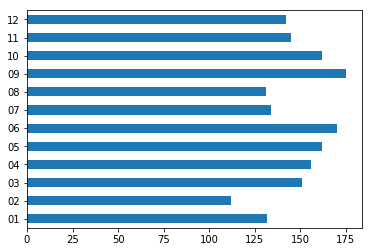

In [24]:
df_wall_punch['trmt_date'].str.extract('(\d\d)').value_counts().sort_index(ascending = True).plot(kind = 'barh')

## Sort the graph so that the months are in order from Jan-Dec (or 01-12)

In [25]:
#done above 

## What month is most common for air conditioner-related injuries?

Use the product code, which you can find in `2017ComparabilityTable.pdf` or `categories-cleaned.txt`.

In [26]:
df_air = df[df['narr1'].str.contains("AIR.*CONDITION")]
df_air


,CPSC Case #,trmt_date,psu,weight,stratum,age,sex,race,race_other,diag,diag_other,body_part,disposition,location,fmv,prod1,prod2,narr1,narr2
1917,150902259,08/30/2015,58,15.7762,V,9,Male,0,NaN,59,NaN,35,1,1,0,381,NaN,9 YOM HIT KNEE ON AIR CONDITIONER,DX LACERATION
1940,150446654,04/22/2015,33,15.0591,V,41,Male,1,NaN,54,NaN,83,1,1,0,381,NaN,41 YOM DROPPED AIR CONDITIONER ON L FOOT AT HO...,NaN
3464,150451830,04/19/2015,53,15.0591,V,33,Female,1,NaN,71,SHOULDER PAIN,30,1,1,0,381,NaN,33YOF-SHOULDER & ANKLE PAIN-FELL WHILE CARRYIN...,ME
3795,150717896,07/05/2015,7,83.2157,S,49,Female,0,NaN,59,NaN,88,1,1,0,381,NaN,49 Y O F LIP LACERATION SHE TRIPPED AND STRUCK...,PLAYING WITH HER DOG
6958,151143964,11/13/2015,51,74.8813,L,18,Female,2,NaN,71,HEADACHE,75,1,0,0,381,NaN,18 YO F C/O FRONTAL HEADACHE S/P HITTING HEAD ...,DAY DX HEADACHE
8569,151059865,10/21/2015,95,16.5650,V,53,Male,1,NaN,64,NaN,79,1,0,0,381,NaN,LUMBAR STR. 53YOM STRAINED LOWER BACK MOVING ...,NaN
11746,150703973,06/22/2015,68,97.9239,M,61,Male,1,NaN,67,NaN,85,1,1,0,381,NaN,61 YOM TRIED TAKING OFF THE COVER OF AIR CONDI...,"ENT THROUGH BODY. DX MILD RHABDOMYOLYSIS, ELEC..."
11867,151115868,10/14/2015,54,49.2646,M,20,Female,1,NaN,53,NaN,83,1,1,0,381,NaN,20YOF DROPPED AIR CONDITIONER ON RT FOOT. PAIN...,TOE DX: FOOT CONTUSION
12845,150726308,07/05/2015,89,74.8813,L,28,Male,1,NaN,57,NaN,31,1,1,0,381,NaN,28 YO M PT WAS WORKING ON HIS AIR CONDITIONER ...,"T LANDING ON THE GROUND,HURTING UPPER BACK,.DX..."
14096,150728689,07/09/2015,38,15.7762,V,2,Female,0,NaN,59,NaN,76,1,1,0,381,NaN,2YR OLD FEMALE FELL INTO AIRCONDITIONER CORNER...,NaN


In [27]:
df_air['trmt_date'].str.extract('(\d\d)').value_counts().head(1)

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  """Entry point for launching an IPython kernel.


07    36
Name: trmt_date, dtype: int64

In [28]:
#so July is the most common 

## Find what else people punched using the prod1 and prod2 columns.

Look at the top 10 for each separately.

In [29]:
df['prod1'] = df.prod1.str.pad(4, fillchar = '0')
df['prod2'] = df.prod2.str.pad(4, fillchar = '0')
df_all_punch = df[df['narr1'].str.contains('PUNCH')]
df_all_punch['prod1'].value_counts(ascending = False).head(10)
#df_all_punch['prod1'].value_counts().head(10) 

1884    1796
1894     566
1893     244
1207     159
4004     122
0276      74
4057      53
1892      48
1726      42
1807      41
Name: prod1, dtype: int64

In [30]:
df_all_punch['prod2'].value_counts(ascending = False).head(10)

1884    31
1893    13
1807     7
1207     7
4056     6
1892     6
0604     4
1865     4
0676     3
1819     3
Name: prod2, dtype: int64

## Uh, they're the same!

The order of `prod1` and `prod2` don't actually matter!

> When only one product is associated with an injury, place the product code for that product in the space allocated for "First Product Code" and fill in the "Second Product Code" spaces with 4 zeros (0000).
When two products are associated with an injury, either product may be coded as the first product and the other as the second product.
>
> Example: An 11-year old boy riding a bicycle ran into a swing. Code: Product 1 = 5040 (bicycle) and Product 2 = 3246 (swings) or
>
> Code: Product 1 = 3246 (swings) and Product 2 = 5040 (bicycle)

## Okay, okay, there’s no difference between prod1 and prod2, so you should add their frequencies together for an overall count!

It's *almost* as easy as adding together the `value_counts()`.

Take a look at the air conditioner question and the `.value_counts()` you just did, though, to see why combining them might not be that simple. **What is different about `prod1` and `prod2`?** You probably have to go all the way back up to where you read the file in to make them match.

In [33]:
df['prod2'].replace(np.nan, '0000', inplace = True)
df['prod1'].replace(np.nan, '0000', inplace = True)

In [46]:
prod1_value_counts = df_all_punch['prod1'].value_counts(ascending = False)

prod2_value_counts = df_all_punch['prod2'].value_counts(ascending = False)

In [47]:
prod1_value_counts.add(prod2_value_counts, fill_value=0).sort_values(ascending=False).head(10)

1884    1827.0
1894     568.0
1893     257.0
1207     166.0
4004     124.0
0276      74.0
1892      54.0
4057      53.0
1807      48.0
4056      43.0
dtype: float64

In [35]:
#(prod1_value_counts+prod2_value_counts).sort_values(ascending=False).head(10)

## Turn that into a dataframe

Use `.reset_index()` on the result to turn it into a dataframe. Rename your columns to be `product_code` and `injury_count`.

In [36]:
df_prods = prod1_value_counts.add(prod2_value_counts, fill_value=0).reset_index()
df_prods = df_prods.rename(columns={'index' : 'product_code', 0 : 'injury_count'})
df_prods.sort_values('injury_count', ascending = False)

,product_code,injury_count
89,1884,1827.0
95,1894,568.0
94,1893,257.0
52,1207,166.0
109,4004,124.0
8,0276,74.0
93,1892,54.0
117,4057,53.0
78,1807,48.0
116,4056,43.0


## Fix the product codes

Uh, wait, look at those product codes. "102" shouldn't be possible, it should be `0102` - this actually doesn't have to do with coding, it has to do with *the data doesn't match the codebook*.

### Add zeroes to the left of the product code until it is 4 characters long

In [37]:
#They all have 4 digits.

## Get meaningful names for "product code"

Join with `categories-cleaned.txt` to turn the codes into actual words. **When you read in `categories-cleaned.txt`, make sure it has 803 rows and 2 columns.**

In [38]:
df_categories = pd.read_csv('categories-cleaned.txt', header = None, names = ["product_code", "description"], dtype= {'product_code': str})
df_categories.head()

,product_code,description
0,0102,Wringer washing machines
1,0106,Electric clothes dryers without washers
2,0107,Gas clothes dryers without washers
3,0110,Electric heating pads
4,0112,Sewing machines or accessories


In [39]:
df_categories.shape

(803, 2)

### Confirm that it worked by seeing if product code '0102' gives you 'Wringer washing machines"

In [40]:
df_categories.head()

,product_code,description
0,0102,Wringer washing machines
1,0106,Electric clothes dryers without washers
2,0107,Gas clothes dryers without washers
3,0110,Electric heating pads
4,0112,Sewing machines or accessories


In [41]:
combined_df = df_prods.merge(df_categories, left_on = 'product_code', right_on = 'product_code')
combined_df.head()

,product_code,injury_count,description
0,0115,1.0,Vacuum cleaners
1,0136,1.0,Drinking fountains
2,0137,1.0,Automatic doors or door openers (excluding gar...
3,0138,1.0,Automatic garage doors or door openers
4,0140,1.0,"Washing machines, other or not specified"


## Graph the top 10 most popular products for injuries 

In [42]:
graph = combined_df.sort_values('injury_count', ascending = False).head(10)

graph.head(10)

,product_code,injury_count,description
89,1884,1827.0,Ceilings and walls (interior part of completed...
95,1894,568.0,"Windows and window glass, other than storm win..."
94,1893,257.0,"Doors, other or not specified"
52,1207,166.0,"Boxing (activity, apparel or equipment)"
109,4004,124.0,Mirrors or mirror glass (excluding lighted mak...
8,0276,74.0,Refrigerators
93,1892,54.0,Glass doors or doors with glass panels
117,4057,53.0,"Tables, not elsewhere classified (excl. baby c..."
78,1807,48.0,Floors or flooring materials
116,4056,43.0,"Cabinets, racks, room dividers and shelves, no..."


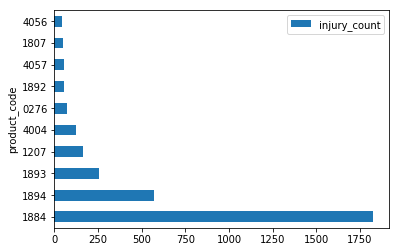

In [43]:
graph.head(10).plot(kind = 'barh', x = 'product_code', y = 'injury_count')